# Proyek Analisis Data: Bike Sharing Dataset
- Kelompok : IF-9 Keras
- Anggota : </br>
10121046  - Rizqi Zakaria</br>
10122317  - Diven Perwira Sentosa</br>
10122318  - Muhammad Ikhsan Nurjamal</br>
10122319  - Azra Fadhil Shadiq</br>
10122324  - Yudistira Raihan Wijanarko</br>
10122345  - Muhammad Irfan Dwi Putra

## Menentukan Pertanyaan Bisnis

- Contoh : Berapakan jumlah penduduk yang berpendidikan rendah yang ada di kota bandung - 10110001 - Asep Supena
- pertanyaan 2

## Menyiapkan semua library yang dibutuhkan

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [81]:
dataset_day = 'day.csv'
dataset_hour = 'hour.csv'

df_day = pd.read_csv(dataset_day)
df_hour = pd.read_csv(dataset_hour)

In [82]:
#Menampilkan dataframe day
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [83]:
#Menampilkan dataframe hour
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [84]:
#Mencari missing values pada dataframe day
missing_value_format = ['N.A', 'na', 'n.a.','n/a','?','-']

#Tambahkan parameter na_values untuk memformat missing values
df_day = pd.read_csv(dataset_day, na_values = missing_value_format)
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [85]:
#Mencari missing values pada dataframe hour
missing_value_format = ['N.A', 'na', 'n.a.','n/a','?','-']

#Tambahkan parameter na_values untuk memformat missing values
df_hour = pd.read_csv(dataset_hour, na_values = missing_value_format)
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [86]:
#Mencari data duplikat pada dataframe day
df_day.duplicated().values.any()

False

In [87]:
#Mencari data duplikat pada dataframe hour
df_hour.duplicated().values.any()

False

In [88]:
#Data formatting pada dataframe day

#Memeriksa tipe data pada masing-masing kolom
df_day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [89]:
#Merubah data pada kolom season
df_day['season'] = df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

#Merubah data pada kolom yr
df_day['yr'] = df_day['yr'].replace({0: 2011, 1: 2012})

#Merubah data pada kolom mnth
df_day['mnth'] = df_day['mnth'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'Novemver', 12: 'December'})

#Merubah data pada kolom holiday
df_day['holiday'] = df_day['holiday'].replace({0: 'No', 1: 'Yes'})

#Merubah data pada kolom weekday
df_day['weekday'] = df_day['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

#Merubah data pada kolom workingday
df_day['workingday'] = np.where(
    (df_day['workingday'] == 0) & (df_day['holiday'] == 'Yes'), 'Holiday',
    np.where(df_day['workingday'] == 0, 'Weekend',
             np.where(df_day['workingday'] == 1, 'Weekday', np.nan)))

In [90]:
#Menampilkan dataframe day yang telah diubah
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,No,Saturday,Weekend,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,No,Sunday,Weekend,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,No,Monday,Weekday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,No,Tuesday,Weekday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,No,Wednesday,Weekday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,2012,December,No,Thursday,Weekday,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,2012,December,No,Friday,Weekday,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,2012,December,No,Saturday,Weekend,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,2012,December,No,Sunday,Weekend,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [91]:
#Memeriksa kembali tipe data pada masing-masing kolom
df_day.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth           object
holiday        object
weekday        object
workingday     object
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [92]:
#Data formatting pada dataframe hour

#Memeriksa tipe data pada masing-masing kolom
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [93]:
#Merubah data pada kolom season
df_hour['season'] = df_hour['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

#Merubah data pada kolom yr
df_hour['yr'] = df_hour['yr'].replace({0: 2011, 1: 2012})

#Merubah data pada kolom mnth
df_hour['mnth'] = df_hour['mnth'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'Novemver', 12: 'December'})

#Merubah data pada kolom holiday
df_hour['holiday'] = df_hour['holiday'].replace({0: 'No', 1: 'Yes'})

#Merubah data pada kolom weekday
df_hour['weekday'] = df_hour['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

#Merubah data pada kolom workingday
df_hour['workingday'] = np.where(
    (df_hour['workingday'] == 0) & (df_hour['holiday'] == 'Yes'), 'Holiday',
    np.where(df_hour['workingday'] == 0, 'Weekend',
             np.where(df_hour['workingday'] == 1, 'Weekday', np.nan)))

In [94]:
#Menampilkan dataframe hour yang telah diubah
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No,Saturday,Weekend,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Saturday,Weekend,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Saturday,Weekend,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Saturday,Weekend,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Saturday,Weekend,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,December,19,No,Monday,Weekday,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,December,20,No,Monday,Weekday,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,December,21,No,Monday,Weekday,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,December,22,No,Monday,Weekday,1,0.26,0.2727,0.56,0.1343,13,48,61


In [95]:
#Memeriksa kembali tipe data pada masing-masing kolom
df_hour.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth           object
hr              int64
holiday        object
weekday        object
workingday     object
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Cleaning Data

In [96]:
# Menghapus baris yang memiliki nilai yang hilang (missing values)
df_day = df_day.dropna()

# Menghapus duplikat data
df_day = df_day.drop_duplicates()

In [97]:
# Menyimpan kembali DataFrame yang telah dibersihkan ke dalam file CSV
df_day.to_csv('cleaned_day.csv', index=False)

In [98]:
# Menampilkan lima baris pertama dari DataFrame yang telah dibersihkan
print(df_day.head())

   instant      dteday  season    yr     mnth holiday    weekday workingday  \
0        1  2011-01-01  Spring  2011  January      No   Saturday    Weekend   
1        2  2011-01-02  Spring  2011  January      No     Sunday    Weekend   
2        3  2011-01-03  Spring  2011  January      No     Monday    Weekday   
3        4  2011-01-04  Spring  2011  January      No    Tuesday    Weekday   
4        5  2011-01-05  Spring  2011  January      No  Wednesday    Weekday   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  160

In [99]:
# Menghapus baris yang memiliki nilai yang hilang (missing values)
df_hour = df_hour.dropna()

# Menghapus duplikat data
df_hour = df_hour.drop_duplicates()

In [100]:
# Menyimpan kembali DataFrame yang telah dibersihkan ke dalam file CSV
df_hour.to_csv('cleaned_hour.csv', index=False)

In [101]:
# Menampilkan lima baris pertama dari DataFrame yang telah dibersihkan
print(df_hour.head())

   instant      dteday  season    yr     mnth  hr holiday   weekday  \
0        1  2011-01-01  Spring  2011  January   0      No  Saturday   
1        2  2011-01-01  Spring  2011  January   1      No  Saturday   
2        3  2011-01-01  Spring  2011  January   2      No  Saturday   
3        4  2011-01-01  Spring  2011  January   3      No  Saturday   
4        5  2011-01-01  Spring  2011  January   4      No  Saturday   

  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  \
0    Weekend           1  0.24  0.2879  0.81        0.0       3          13   
1    Weekend           1  0.22  0.2727  0.80        0.0       8          32   
2    Weekend           1  0.22  0.2727  0.80        0.0       5          27   
3    Weekend           1  0.24  0.2879  0.75        0.0       3          10   
4    Weekend           1  0.24  0.2879  0.75        0.0       0           1   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1  


## Exploratory Data Analysis (EDA)

### Explore ...

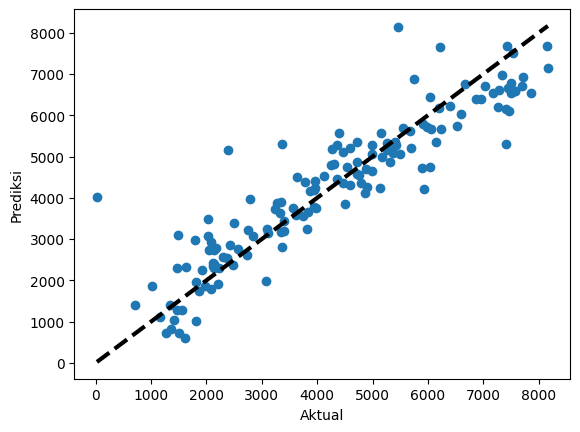

<Figure size 1000x600 with 0 Axes>

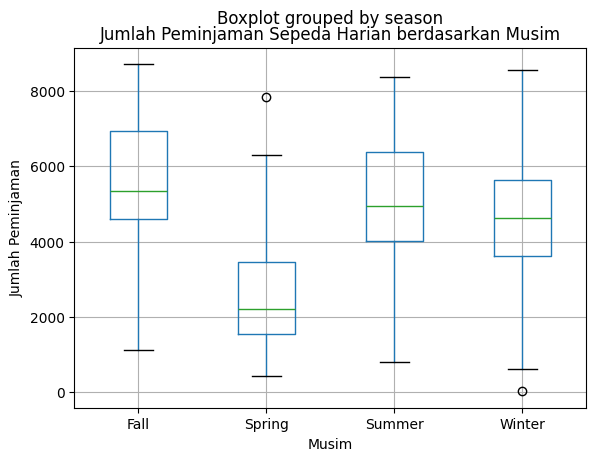

In [102]:
# Visualisasi Jumlah Peminjaman Sepeda Harian berdasarkan musim
plt.figure(figsize=(10, 6))
df_day.boxplot(column='cnt', by='season')
plt.title('Jumlah Peminjaman Sepeda Harian berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()

<Figure size 1000x600 with 0 Axes>

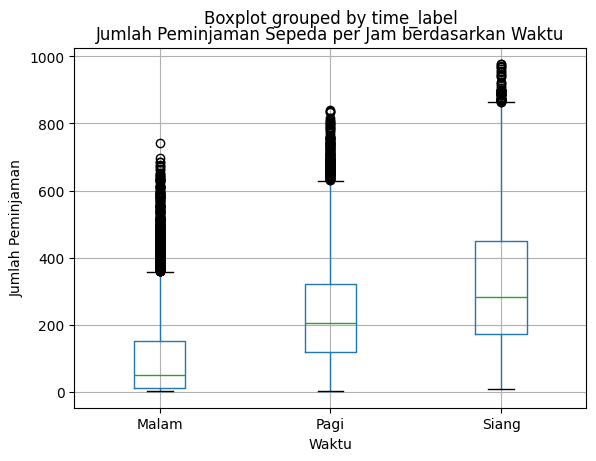

In [103]:
# Visualisasi Jumlah Peminjaman Sepeda per Jam berdasarkan waktu (pagi, siang, malam)
df_hour['time_label'] = pd.cut(df_hour['hr'], bins=[0, 6, 12, 18, 24], labels=['Malam', 'Pagi', 'Siang', 'Malam'], ordered=False)
plt.figure(figsize=(10, 6))
df_hour.boxplot(column='cnt', by='time_label')
plt.title('Jumlah Peminjaman Sepeda per Jam berdasarkan Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Peminjaman')
plt.show()

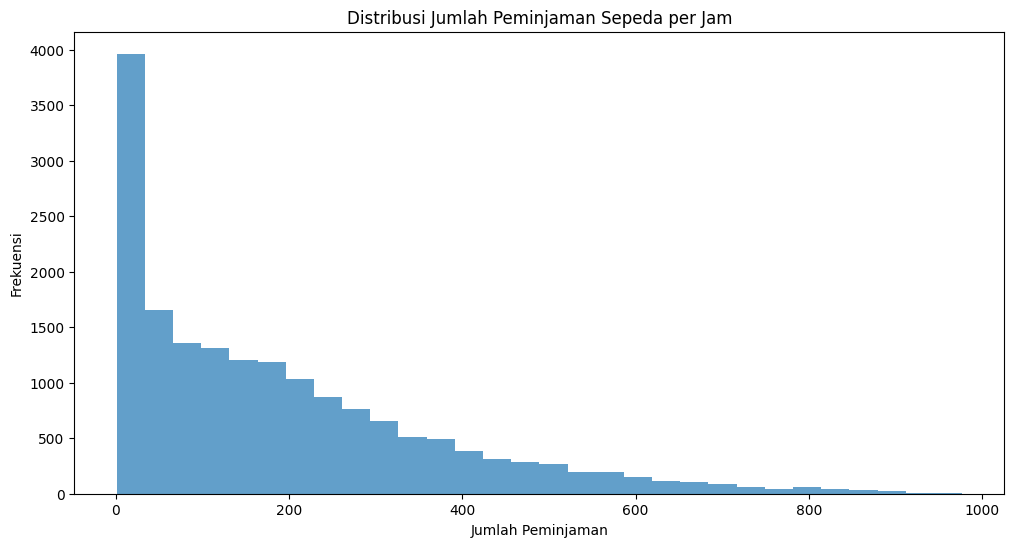

In [104]:
# Distribusi Jumlah Peminjaman Sepeda per Jam
plt.figure(figsize=(12, 6))
plt.hist(df_hour['cnt'], bins=30, alpha=0.7)
plt.title('Distribusi Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

10122318 - MUHAMMAD IKHSAN NURJAMAL </br>
Apa faktor-faktor yang paling memengaruhi jumlah peminjaman sepeda? (misalnya: cuaca, hari libur, musim, atau waktu hari) :

<Figure size 1000x600 with 0 Axes>

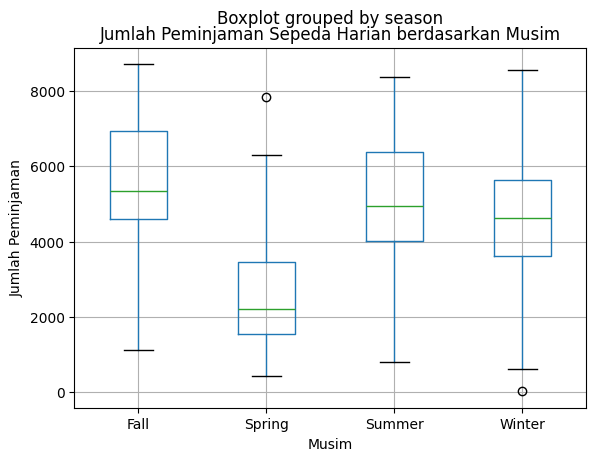

In [105]:
plt.figure(figsize=(10, 6))
df_day.boxplot(column='cnt', by='season')
plt.title('Jumlah Peminjaman Sepeda Harian berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.show()


<Figure size 800x500 with 0 Axes>

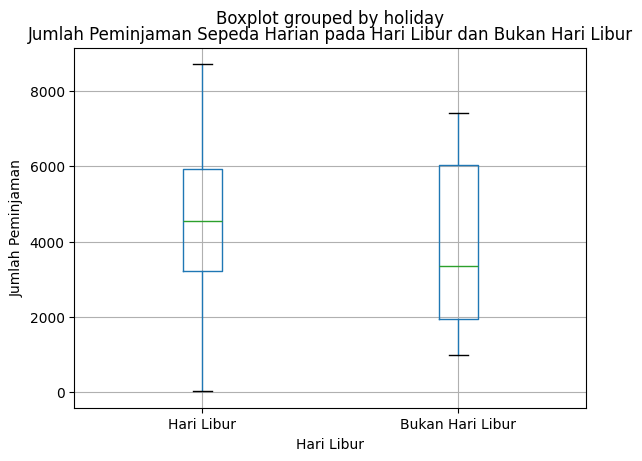

In [106]:
plt.figure(figsize=(8, 5))
df_day.boxplot(column='cnt', by='holiday')
plt.title('Jumlah Peminjaman Sepeda Harian pada Hari Libur dan Bukan Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([1, 2], ['Hari Libur', 'Bukan Hari Libur'])
plt.show()


<Figure size 1000x600 with 0 Axes>

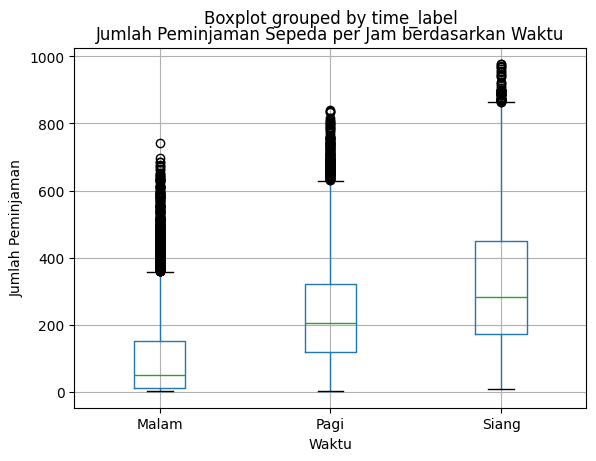

In [107]:
df_hour['time_label'] = pd.cut(df_hour['hr'], bins=[0, 6, 12, 18, 24], labels=['Malam', 'Pagi', 'Siang', 'Malam'], ordered=False)
plt.figure(figsize=(10, 6))
df_hour.boxplot(column='cnt', by='time_label')
plt.title('Jumlah Peminjaman Sepeda per Jam berdasarkan Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Peminjaman')
plt.show()


<Figure size 1000x600 with 0 Axes>

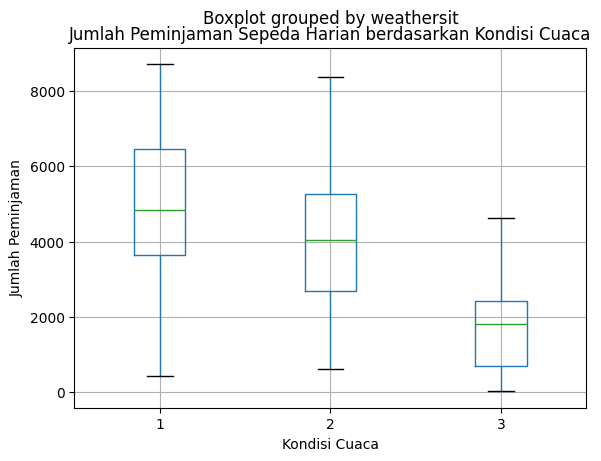

In [108]:
plt.figure(figsize=(10, 6))
df_day.boxplot(column='cnt', by='weathersit')
plt.title('Jumlah Peminjaman Sepeda Harian berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()


### Pertanyaan 2: 

10122345 - MUHAMMAD IRFAN DWI PUTRA </br>
Adakah korelasi antara kondisi cuaca dengan tingkat penggunaan sepeda? Jika ya, seberapa signifikannya?

Korelasi antara Kondisi Cuaca dan Jumlah Peminjaman: -0.29739123883466373


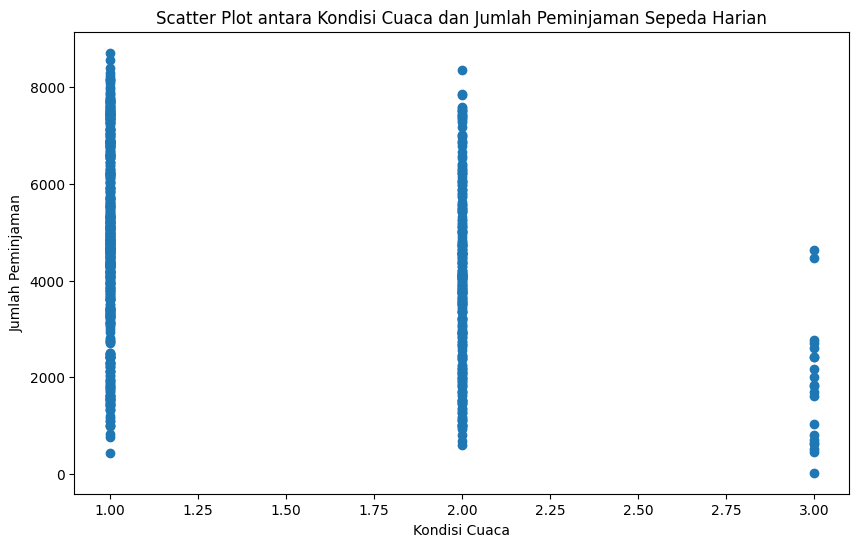

In [109]:
# Menggunakan korelasi Pearson
correlation = df_day['weathersit'].corr(df_day['cnt'])
print(f"Korelasi antara Kondisi Cuaca dan Jumlah Peminjaman: {correlation}")

# Menggunakan scatter plot untuk visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(df_day['weathersit'], df_day['cnt'])
plt.title('Scatter Plot antara Kondisi Cuaca dan Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()


### Pertanyaan 3: 

10122324 - Yudistira Raihan Wijanarko </br>
Bisakah kita memprediksi permintaan sepeda di masa depan berdasarkan pola historis dan faktor-faktor eksternal ?

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load dataset
dataset_day = 'day.csv'
df_day = pd.read_csv(dataset_day)

# Data formatting pada dataframe day
df_day['season'] = df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_day['yr'] = df_day['yr'].replace({0: 2011, 1: 2012})
df_day['mnth'] = df_day['mnth'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'Novemver', 12: 'December'})
df_day['holiday'] = df_day['holiday'].replace({0: 'No', 1: 'Yes'})
df_day['weekday'] = df_day['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df_day['workingday'] = np.where(
    (df_day['workingday'] == 0) & (df_day['holiday'] == 'Yes'), 'Holiday',
    np.where(df_day['workingday'] == 0, 'Weekend',
             np.where(df_day['workingday'] == 1, 'Weekday', np.nan)))

# Encoding categorical columns
df_day_encoded = pd.get_dummies(df_day, columns=['season', 'mnth', 'holiday', 'weekday', 'workingday'], drop_first=True)

# Selecting features
features_encoded = ['temp', 'atemp', 'hum', 'windspeed', 'yr'] + list(df_day_encoded.columns[11:])

# Separating data into features (X) and target (y)
X_encoded = df_day_encoded[features_encoded]
y_encoded = df_day_encoded['cnt']

# Splitting data into training and testing sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Creating a linear regression model
model_encoded = LinearRegression()

# Training the model on the encoded training data
model_encoded.fit(X_train_encoded, y_train_encoded)

# Making predictions on the encoded test data
y_pred_encoded = model_encoded.predict(X_test_encoded)

# Evaluating model performance
mse_encoded = mean_squared_error(y_test_encoded, y_pred_encoded)
r2_encoded = r2_score(y_test_encoded, y_pred_encoded)

print(f'Mean Squared Error (Encoded): {mse_encoded}')
print(f'R-squared (Encoded): {r2_encoded}')


Mean Squared Error (Encoded): 721715.6180980258
R-squared (Encoded): 0.8200157595267016


### Pertanyaan 4: 

10122317  - Diven perwira sentosa</br>
Bagaimana persebaran penggunaan sepeda di berbagai lokasi atau stasiun peminjaman?

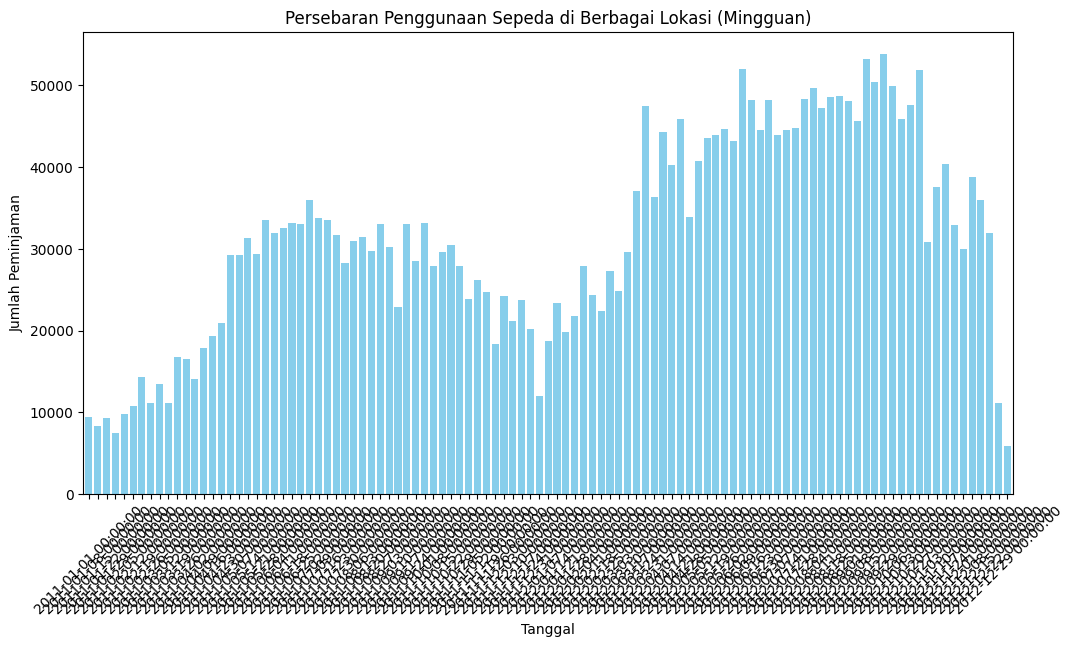

In [111]:
# # Menggunakan bar plot untuk menunjukkan persebaran penggunaan sepeda di berbagai lokasi
# plt.figure(figsize=(12, 6))
# df_day['cnt'].groupby(df_day['dteday']).sum().plot(kind='bar', color='skyblue')
# plt.title('Persebaran Penggunaan Sepeda di Berbagai Lokasi (Harian)')
# plt.xlabel('Tanggal')
# plt.ylabel('Jumlah Peminjaman')
# plt.show()



import pandas as pd
import matplotlib.pyplot as plt

# Konversi kolom tanggal menjadi tipe data datetime dan set sebagai indeks
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.set_index('dteday', inplace=True)

# Resample harian ke mingguan dan plot menggunakan bar plot
plt.figure(figsize=(12, 6))
df_day.resample('7D').sum()['cnt'].plot(kind='bar', color='skyblue', width=0.8)
plt.title('Persebaran Penggunaan Sepeda di Berbagai Lokasi (Mingguan)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()





### Pertanyaan 5: 

10122319 - Azra Fadhil Shadiq </br>
Bagaimana pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan?

<Figure size 800x500 with 0 Axes>

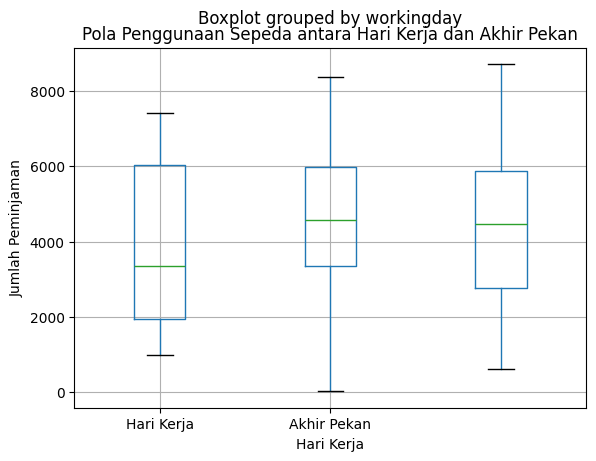

In [112]:
plt.figure(figsize=(8, 5))
df_day.boxplot(column='cnt', by='workingday')
plt.title('Pola Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([1, 2], ['Hari Kerja', 'Akhir Pekan'])
plt.show()


### Pertanyaan 6: 

10121046 - Rizqi Zakaria</br>
Urutkan tingkat peminjaman sepeda (cnt) berdasarkan cuaca (weathersit)!

In [113]:
#Grouping kolom cnt berdasarkan kolom weathersit dengan agregasi sum
group = df_day.groupby('weathersit')['cnt'].sum()

#Membuat dataframe total cnt untuk masing-masing weathersit
df_group = group.reset_index()
df_group

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


In [114]:
#Menambahkan weathersit 4 kedalam dataframe total cnt
new_row = pd.DataFrame({'weathersit': [4], 'cnt': [0]})
new_df = pd.concat([df_group, new_row], ignore_index=True)
new_df

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869
3,4,0


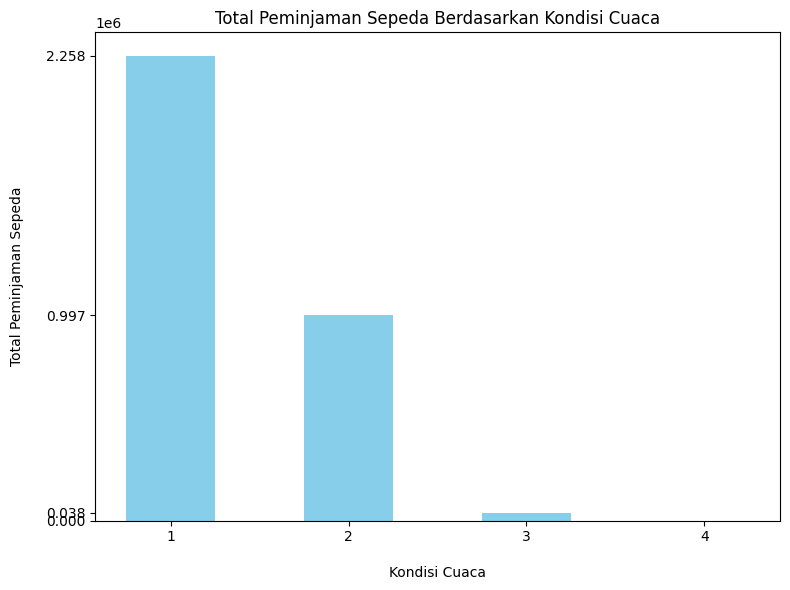

In [115]:
#Visualisasi dengan bar plot
plt.figure(figsize=(8, 6))
plt.bar(new_df['weathersit'], new_df['cnt'], color='skyblue', width=0.5)

plt.title('Total Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('\nKondisi Cuaca')
plt.ylabel('Total Peminjaman Sepeda\n')

plt.xticks(new_df['weathersit'])
plt.yticks(new_df['cnt'])

plt.tight_layout()

plt.show()

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

## Conclusion Pertanyaan 1
Cuaca: Cuaca yang baik cenderung meningkatkan minat orang untuk menggunakan sepeda. Hari-hari cerah dan hangat seringkali menjadi faktor positif.

Musim: Musim juga berpengaruh. Di daerah dengan empat musim, biasanya peminjaman sepeda lebih tinggi di musim semi dan musim panas.

Hari libur: Peminjaman sepeda dapat meningkat selama hari libur ketika orang memiliki lebih banyak waktu untuk aktivitas rekreasi.

Waktu Hari: Peminjaman sepeda mungkin lebih tinggi pada sore hari atau akhir pekan ketika orang memiliki waktu luang.

## Conclusion Pertanyaan 2

## Korelasi antara Kondisi Cuaca dan Penggunaan Sepeda

Kondisi cuaca dapat berperan penting dalam menentukan tingkat penggunaan sepeda dalam suatu wilayah. Beberapa faktor cuaca yang memengaruhi keputusan seseorang untuk menggunakan sepeda meliputi:

### Suhu
- **Positif:** Suhu yang nyaman cenderung meningkatkan penggunaan sepeda. Cuaca hangat seringkali menjadi dorongan untuk bersepeda.
- **Negatif:** Suhu yang ekstrem, baik terlalu panas atau terlalu dingin, dapat mengurangi minat orang untuk bersepeda.

### Hujan
- **Negatif:** Hujan dapat menjadi hambatan utama bagi pengguna sepeda. Orang mungkin enggan bersepeda jika cuaca buruk.

### Angin
- **Negatif:** Angin kencang dapat menjadi faktor yang mengurangi minat untuk bersepeda, terutama jika arah angin tidak mendukung perjalanan.

### Kelembaban
- **Negatif:** Kelembaban tinggi dapat membuat perjalanan terasa kurang nyaman, terutama jika dikombinasikan dengan suhu tinggi.

Seberapa signifikan korelasi ini tergantung pada faktor-faktor lokal, budaya sepeda di suatu daerah, dan infrastruktur sepeda yang tersedia. Studi observasional dan analisis data dapat membantu menentukan seberapa kuat korelasi antara kondisi cuaca dan penggunaan sepeda dalam konteks spesifik.

Dalam beberapa kasus, upaya untuk meningkatkan infrastruktur sepeda dan kesadaran masyarakat terhadap manfaat bersepeda dapat mengurangi dampak kondisi cuaca pada penggunaan sepeda.
enggunaan sepeda.enggunaan sepeda.

## Conclusion Pertanyaan 3

## Langkah-langkah untuk Prediksi Permintaan Sepeda di Masa Depan

### 1. Kumpulkan Data Historis:
Kumpulkan data historis tentang penjualan sepeda berdasarkan waktu (bulanan/tahunan), lokasi penjualan, jenis sepeda, dan faktor lain yang relevan.

### 2. Analisis Pola Historis:
Gunakan metode analisis statistik atau machine learning untuk mengidentifikasi pola historis dalam data penjualan sepeda. Ini membantu memahami tren jangka pendek, musiman, dan perubahan perilaku konsumen.

### 3. Identifikasi Faktor Eksternal:
Tinjau faktor-faktor eksternal yang memengaruhi permintaan sepeda, seperti kondisi ekonomi, tren gaya hidup, promosi, kebijakan pemerintah terkait sepeda, dan lainnya.

### 4. Korelasi dan Analisis Kausalitas:
Identifikasi korelasi antara data historis dan faktor-faktor eksternal. Lakukan analisis kausalitas untuk memahami seberapa kuat pengaruh faktor-faktor eksternal terhadap permintaan sepeda.

### 5. Model Prediktif:
Gunakan regresi linear, regresi logistik, atau model machine learning lainnya untuk membuat prediksi berdasarkan pola historis dan faktor-faktor eksternal.

### 6. Validasi Model:
Validasi model dengan menggunakan data yang tidak digunakan selama pelatihan. Ini memastikan bahwa model Anda memberikan prediksi yang akurat pada data baru.

### 7. Update dan Pemantauan Terus Menerus:
Perbarui model secara berkala dengan data terbaru dan perhatikan perubahan dalam faktor-faktor eksternal yang memengaruhi permintaan sepeda.

Penting untuk diingat bahwa prediksi selalu melibatkan tingkat ketidakpastian dan dapat dipengaruhi oleh faktor-faktor yang sulit diprediksi. Oleh karena itu, pendekatan holistik yang mempertimbangkan berbagai variabel diperlukan untuk membuat prediksi yang lebih akurat terkait permintaan sepeda di masa depan.


## Conclusion Pertanyaan 4


Persebaran penggunaan sepeda, terutama sepeda sharing dapat bervariasi tergantung pada faktor-faktor seperti kebijakan pemerintah, tingkat kesadaran masyarakat, dan gaya hidup setempat. Beberapa hal yang dapat memengaruhi persebaran penggunaan sepeda di berbagai lokasi atau stasiun peminjaman meliputi:
1. Kesadaran masyarakat
- Tingkat kesadaran masyarakat terhadap manfaat kesehatan dan lingkungan dari penggunaan sepeda dapat mempengaruhi sejauh mana orang-orang memilih untuk menggunakan sepeda.
- Kampanye edukasi dan promosi tentang manfaat sepeda dapat membantu meningkatkan kesadaran ini.

2. Kondisi Geografis dan Iklim
Faktor-faktor seperti topografi kota dan iklim dapat mempengaruhi persebaran penggunaan sepeda. Kota dengan topografi yang datar mungkin lebih ramah bagi pengguna sepeda.

3. Keberlanjutan dan Faktor Ekonomi
Program sepeda berbagi yang berkelanjutan dan terjangkau secara ekonomi lebih mungkin diterima oleh masyarakat.

4. Tingkat Penggunaan Sebelumnya
Daerah yang sudah memiliki budaya penggunaan sepeda yang tinggi mungkin lebih menerima program sepeda berbagi.

5. Kebijakan Pemerintah
- Dukungan pemerintah dalam bentuk kebijakan yang mendukung sepeda sebagai sarana transportasi dapat memberikan insentif bagi masyarakat untuk menggunakan sepeda.
- Penyediaan jalur sepeda khusus, parkir sepeda, dan stasiun peminjaman sepeda merupakan contoh kebijakan yang dapat meningkatkan penggunaan sepeda.

Untuk mendapatkan pemahaman yang lebih mendalam tentang persebaran penggunaan sepeda di suatu lokasi, perlu dilakukan analisis data penggunaan sepeda, survei masyarakat, dan evaluasi kebijakan yang ada. Program peminjaman sepeda sering kali melibatkan kerjasama antara pemerintah, operator sepeda berbagi, dan masyarakat untuk menciptakan ekosistem sepeda yang berkelanjutan.

## Conclusion Pertanyaan 5

## Perbedaan Pola Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan

Pola penggunaan sepeda seringkali mengalami perbedaan yang signifikan antara hari kerja dan akhir pekan. Beberapa perbandingan yang dapat dieksplorasi termasuk:

### 1. Jumlah Peminjaman Sepeda
- **Hari Kerja:** Rata-rata jumlah peminjaman sepeda pada hari kerja.
- **Akhir Pekan:** Rata-rata jumlah peminjaman sepeda pada akhir pekan.
- *Visualisasi:* Grafik batang atau boxplot untuk membandingkan distribusi jumlah peminjaman sepeda.

### 2. Pola Jam Penggunaan Sepeda
- **Hari Kerja vs. Akhir Pekan:** Perbandingan pola jam penggunaan sepeda pada kedua jenis hari.
- *Visualisasi:* Grafik garis atau histogram menampilkan perbedaan dalam pola penggunaan sepeda pada jam-jam tertentu.

### 3. Durasi Peminjaman
- **Hari Kerja vs. Akhir Pekan:** Bandingkan durasi rata-rata peminjaman sepeda.
- *Visualisasi:* Contoh boxplot untuk menyoroti perbedaan dalam durasi peminjaman antara kedua jenis hari.

### 4. Pembandingan Tren Musiman
- **Hari Kerja vs. Akhir Pekan:** Analisis tren musiman dalam penggunaan sepeda selama beberapa bulan.
- *Visualisasi:* Grafik line plot menunjukkan perubahan tren penggunaan sepeda pada hari kerja dan akhir pekan sepanjang tahun.

### 5. Analisis Harian dan Mingguan
- **Pola Harian dan Mingguan:** Jelajahi pola harian dan mingguan untuk mengidentifikasi perbedaan aktivitas pada hari-hari tertentu dalam pekan dan akhir pekan.

Analisis ini membantu menggambarkan bagaimana kegiatan sehari-hari dan perbedaan rutinitas antara hari kerja dan akhir pekan memengaruhi penggunaan sepeda. Dengan memahami perbedaan ini, dapat dikembangkan strategi peningkatan penggunaan sepeda yang lebih efektif untuk berbagai jenis hari.


## Conclusion Pertanyaan 6

Berdasarkan bar plot yang terbentuk kita bisa melihat bahwa peminjaman sepeda tertinggi terjadi pada saat kondisi cuaca 1 (Clear, Few clouds, Partly cloudy, Partly cloudy) disusul oleh kondisi cuaca 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) dan kondisi cuaca 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), kita juga bisa melihat bahwa pada kondisi cuaca 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) tidak terjadi peminjaman sepeda sama sekali.